# Plotting with matplotlib 2

In the last lecture we got familiar with matplotlib and used it to plot some various kinds of charts. In the last example, we tried to use many options in matplotlib to make the chart exactly as we want.

In this lecture, we will learn more ways on how to dictate the look of the chart. We will also learn how to use object oriented style of matplotlib, which can be used to write reusable functions to create charts.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Style sheets

Matplotlib allows the user to define style sheets, which defines many visual properties of the chart (like fonts, colors, etc.). Not only that, it ships with many predefined styles, many of which are more elegant that the default look (to my eye, at least).

Let's look at how to use them.

### Data

This is the data containing the details of the reponse of the SF fire department to an emergency. Each row is for one specific response.

We want to measure the distribution of response time of the SF fire department.

In [60]:
df = pd.read_csv('fd_calls_short.csv', parse_dates=[5,9])
df.head(5)

/home/aman/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Call Number,Unit ID,Incident Number,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,...,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Location,Neighborhooods - Analysis Boundaries,RowID
0,180543290,T01,18023190,02/23/2018,02/23/2018,2018-02-23 18:55:05,02/23/2018 06:56:29 PM,02/23/2018 06:57:08 PM,02/23/2018 06:57:13 PM,2018-02-23 19:00:23,...,False,Alarm,1,TRUCK,1,3,6,"(37.783430170318, -122.398387591798)",Financial District/South Beach,180543290-T01
1,163231853,RS1,16128936,11/18/2016,11/18/2016,2016-11-18 12:40:17,11/18/2016 12:41:14 PM,11/18/2016 12:41:36 PM,11/18/2016 12:43:25 PM,2016-11-18 12:45:31,...,False,Potentially Life-Threatening,1,RESCUE SQUAD,1,3,6,"(37.775420706711, -122.403404791479)",South of Market,163231853-RS1
2,173303060,T10,17138693,11/26/2017,11/26/2017,2017-11-26 21:20:49,11/26/2017 09:22:20 PM,11/26/2017 09:22:35 PM,11/26/2017 09:23:35 PM,NaT,...,False,Alarm,1,TRUCK,3,5,2,"(37.784909159111, -122.452936292976)",Presidio Heights,173303060-T10
3,191053189,E05,19044747,04/15/2019,04/15/2019,2019-04-15 17:51:17,04/15/2019 05:51:17 PM,04/15/2019 05:52:21 PM,04/15/2019 05:52:21 PM,2019-04-15 17:53:31,...,False,Potentially Life-Threatening,1,ENGINE,2,2,8,"(37.76956852749686, -122.42240555639769)",Mission,191053189-E05
4,183283685,77,18137922,11/24/2018,11/24/2018,2018-11-24 22:24:29,11/24/2018 10:25:15 PM,11/24/2018 10:26:30 PM,11/24/2018 10:27:00 PM,2018-11-24 22:27:37,...,True,Potentially Life-Threatening,1,MEDIC,1,4,3,"(37.789883351367, -122.418012422783)",Nob Hill,183283685-77


In [61]:
df['response_time_min'] = (df['On Scene DtTm'] - df['Received DtTm']).astype(int)/(1000000000 * 60)

In [62]:
df_response_tm = df[['Incident Number', 'response_time_min']]
df_response_tm = df_response_tm[(df_response_tm['response_time_min'] > 0) & (df_response_tm['response_time_min'] < 60)]
df_response_tm.head(10)

,Incident Number,response_time_min
0,18023190,5.300000
1,16128936,5.233333
3,19044747,2.233333
4,18137922,3.133333
5,17047835,5.600000
6,17110468,16.600000
8,18090456,7.183333
9,16025845,11.266667
10,18126014,3.816667
11,19050609,18.500000


### Pre-defined style sheets

As mentioned before, matplotlib ships with many different style sheets. The list of all styles that are available can be seen using the following variable in the `plt.style` package.

In [5]:
print(plt.style.available)

['_classic_test', 'seaborn-dark', 'Solarize_Light2', 'grayscale', 'seaborn-poster', 'fast', 'seaborn-bright', 'classic', 'seaborn-darkgrid', 'seaborn-notebook', 'seaborn-whitegrid', 'seaborn-pastel', 'seaborn-ticks', 'bmh', 'fivethirtyeight', 'seaborn-paper', 'seaborn-dark-palette', 'seaborn-colorblind', 'tableau-colorblind10', 'seaborn-deep', 'seaborn-muted', 'seaborn-white', 'ggplot', 'dark_background', 'seaborn-talk', 'seaborn']


We can use the function `plt.style.use()` to change the style. This changes the default setting, so all plots created once that has been called will use that style.

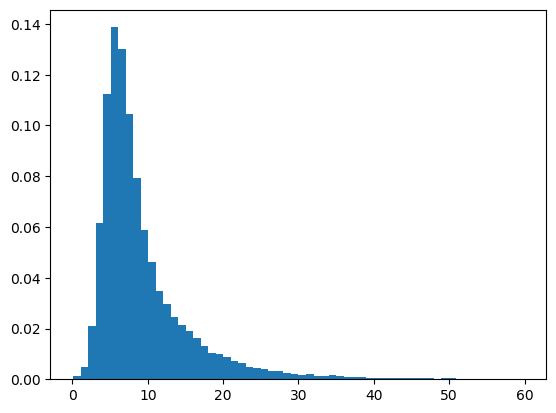

In [6]:
# The string 'default' is used for the default matplotlib style
plt.style.use('default')
plt.hist('response_time_min', bins=60, density=1, data=df_response_tm)
plt.show()

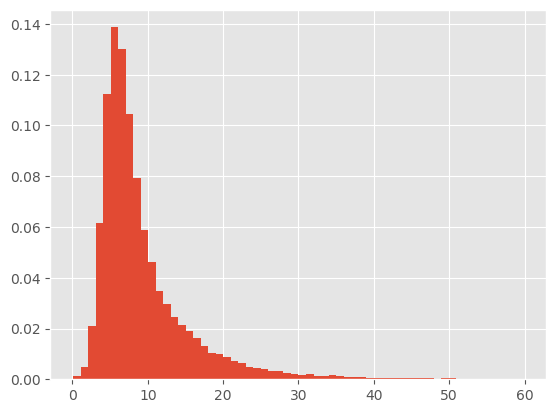

In [7]:
# The following syntax allows you to apply the style only for one plot at a time
# while keeping the global defaults same.


# This style imitates the style of R language plots
with plt.style.context('ggplot'):
    plt.hist('response_time_min', bins=60, density=1, data=df_response_tm)
plt.show()

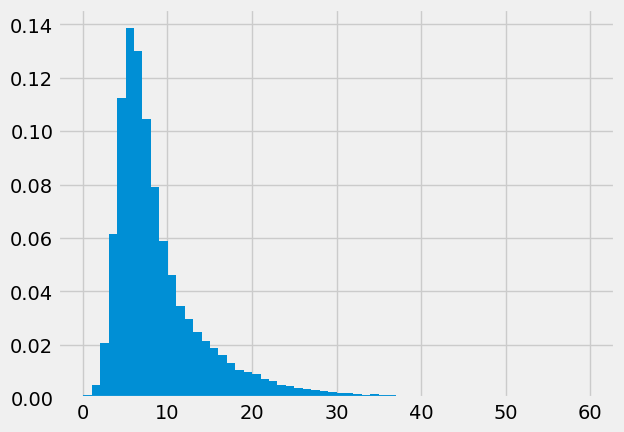

In [8]:
# This style imitates the charts used by popular site fivethirtyeight.com

with plt.style.context('fivethirtyeight'):
    plt.hist('response_time_min', bins=60, density=1, data=df_response_tm)
plt.show()

### Exercise

Try as many styles as you can and choose one which you like the best for this chart.

## Custom styling

You can specify style parameters which can override the default. You can also group those parameters and give them a name, which you can use like pre-built style sheets in the last section. We will look at how to do both.

### rcParams

`matplotlib` maintains a global dictionary called `rcParams` which defines the default style settings. To change a few settings, (like background color or font), we can change that dictionary, and all plots will use those updated style.

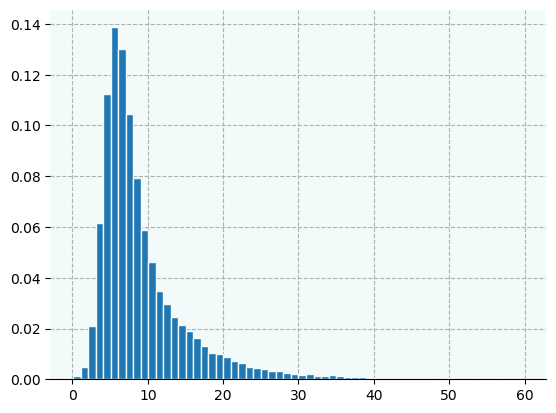

In [9]:
bgcolor = (0.95, 0.98, 0.98)
mpl.rcParams['axes.facecolor'] = bgcolor
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.grid.axis'] = 'both'             
mpl.rcParams['axes.grid.which'] = 'major'
mpl.rcParams['axes.axisbelow'] = True
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['patch.edgecolor'] = bgcolor
mpl.rcParams['patch.force_edgecolor'] = True

plt.hist('response_time_min', bins=60, density=1, data=df_response_tm)
plt.show()

As you can see above, after changing a number of key value pairs in `rcParams` dictionary, we have our own look of the plot. 

Let's create another plot, and see how that chart looks like with this style.

In [63]:
df['call_month'] = df['Received DtTm'].apply(lambda x: x.month)
df_calls_month = df.groupby(['call_month'])['Incident Number'].count()

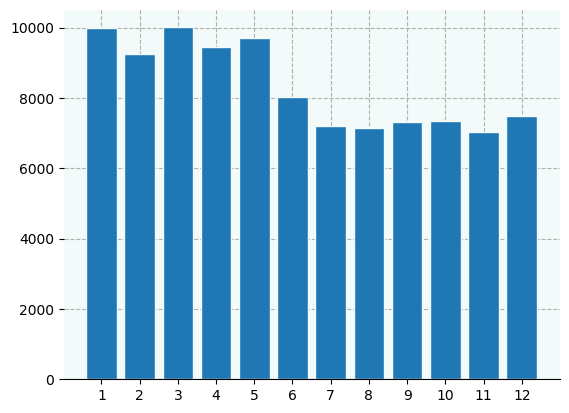

In [11]:
plt.bar(df_calls_month.index, df_calls_month.values)
plt.xticks(range(1,13))
plt.show()

In the previous section, we learnt about `plt.style.use()` function. That function actually works this way:
- the style name is attached to a number of key value pairs to define the style.
- when we call `plt.style.use()`, the `rcParams` dictionary is updated to use the values from that style.

Thus, `rcParams` is the main mechanism in matplotlib to define the default style of the charts.

Try going back to the previous section (like where we used the `ggplot` style), and run that cell again. You will note that the chart looks different - the bars are separated. This is because `ggplot` style doesn't overwrite the `patch.force_edgecolor` setting, and since we set it true in this section, every chart will have an edge line around bars in the charts.

### Custom style sheets

To create custom style sheets, one can **create a file** which sets the style settings in a similar way to how we set the `rcParams` above. Here is an example of the contents of such a file:

```
axes.spines.left : False
axes.spines.right : False
axes.spines.top : False
axes.grid : True
axes.grid.axis : both             
axes.grid.which : major
axes.axisbelow : True
grid.linestyle : --
patch.facecolor : red
```

I saved this file as `main.mplstyle`. 
- We can use the same functions as before (either `plt.style.use()` or `plt.style.context()`) to refer to our style sheet file, and that style will get loaded.
- You can specify a list of styles, instead of just one (this works with pre-built styles as well). Note that if a property overlaps between style sheets, the latter style will override the earlier one.

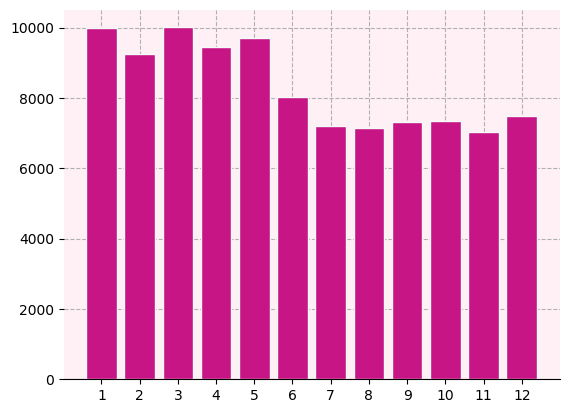

In [12]:
with plt.style.context(['bgcolor.mplstyle', 'main.mplstyle']):
    plt.bar(df_calls_month.index, df_calls_month.values, color='mediumvioletred')
    plt.xticks(range(1,13))
plt.show()

### Useful reference links

- [This link is useful](https://matplotlib.org/tutorials/introductory/customizing.html#a-sample-matplotlibrc-file) for future reference - it provides a very large list of settings that you can use to define your chart style.

- [This link](https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib) lists all the names of colors that you can use in matplotlib, if you don't want to use RGB based colors.

### Exercise

**Step 1:**
Create a chart which is a stacked area plot showing the number of incidents each month for each `Unit Type`. It's similar to the column chart above, but:
- For each month, we can find out how many incidents occured for each Unit Type.
- It will be a stacked area plot, and not a stacked column chart.

**Step 2:**
Define your own style sheet which uses the following image as inspiration. Take care of the following:
- Color of lines and areas. Look at `axes.prop_cycle` property at the reference link above.
- Transparency of area colors
- Background color inside the chart boundary
- Background color outside the chart boundary
- Dot style
- Grid style
- Font type, name and color
- Placement of axis labels and title
- Legend style
- Spines
- X and Y axis ticks

![Sample image](https://raw.githubusercontent.com/amangup/data-analysis-bootcamp/master/11-Matplotlib2/chart.jpg)


## Object oriented style

In the last lecture, we discussed multiple styles of working with `matplotlib`, and this section we will see some examples where we use the Object Oriented style of working to take the customization of our graph to the next level.

### Response time by type of Unit sent

In [15]:
df_units = df[['Unit Type', 'Incident Number', 'response_time_min']]

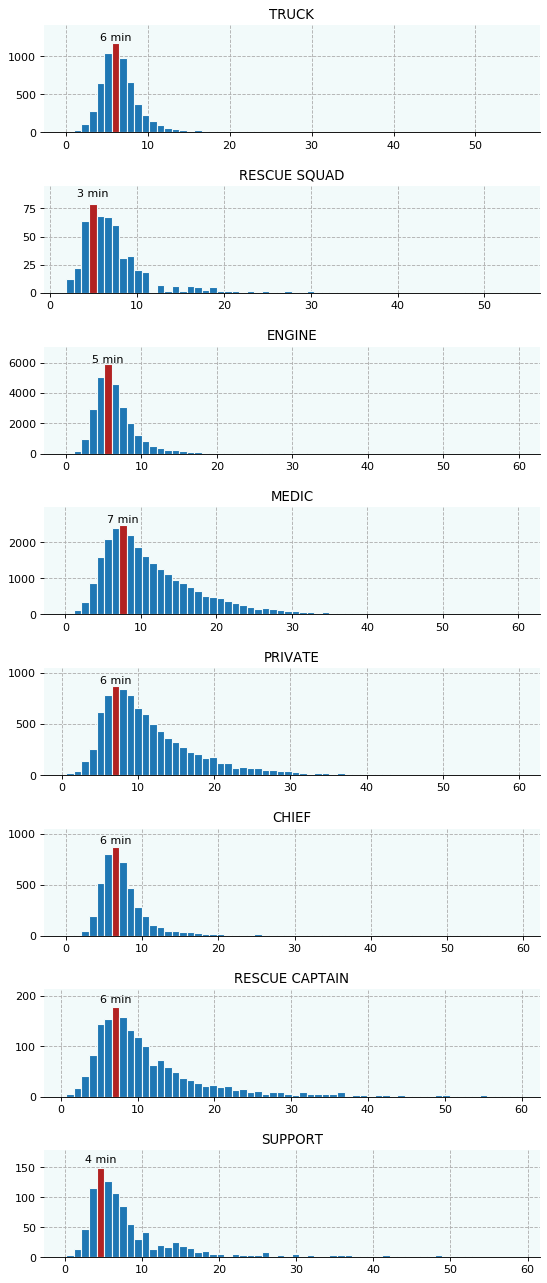

In [16]:
unit_types = df_units['Unit Type'].unique()
unit_types = unit_types[(unit_types != 'AIRPORT') & (unit_types != 'INVESTIGATION')]

plt.style.use('default')
with plt.style.context('blue.mplstyle'):
    fig = plt.figure(figsize=(8,20), dpi=80)
    fig.subplotpars.hspace=0.5
    for i, unit in enumerate(unit_types):
        df_unit = df_units[df_units['Unit Type'] == unit]
        df_unit = df_unit[(df_unit['response_time_min'] > 0) & (df_unit['response_time_min'] < 60)]

        ax = fig.add_subplot(len(unit_types), 1, i+1)
        ax.set_title(unit)    
        values, _, patches = ax.hist('response_time_min', bins=60, data=df_unit)
        max_bar = values.argmax()
        patch = patches[max_bar]
        patch.set_facecolor('firebrick')
        ax.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 5, str(max_bar) + " min",
            ha='center', va='bottom')
        ax.set_ylim(0, values.max() * 1.2)
    
plt.show()

## Map Charts

In this section, we will create a map chart, i.e., plot data on top of a map. To create a map chart, we the source data must have the latitude and longitude. Fortunately, our SFFD incident response data has latitide and longitude for each incident.

### Number of incidents and response time by location

We want to create a plot which shows us how many incidents occur at any location in SF, and what is the average response time for those incidents. To show both of these metrics on the same chart, we will use two different visual cues - we will create dots on the map where incidents have occured, and

- the size of the dot will indicate the number of incidents
- the color of the dot will indicate the response time.

First, let's get our data ready for the plot.

In [59]:
# To parse a tuple string to an actual tuple
from ast import literal_eval
literal_eval(df.iloc[0]['Location']) ## example

(37.783430170318, -122.398387591798)

In [65]:
# parse the `Location` column into latitude and longitude columns
df['latitude'] = df['Location'].apply(lambda x: literal_eval(x)[0])
df['longitude'] = df['Location'].apply(lambda x: literal_eval(x)[1])

# Get only the columns we need
df['response_time_int'] = df['response_time_min'].astype(int)
df_clean = df[(df['response_time_min'] > 0) & (df['response_time_min'] < 60)][['Incident Number', 'Neighborhooods - Analysis Boundaries', 'latitude', 'longitude', 'response_time_min', 'response_time_int']]
df_clean.head(5)

,Incident Number,Neighborhooods - Analysis Boundaries,latitude,longitude,response_time_min,response_time_int
0,18023190,Financial District/South Beach,37.783430,-122.398388,5.300000,5
1,16128936,South of Market,37.775421,-122.403405,5.233333,5
3,19044747,Mission,37.769569,-122.422406,2.233333,2
4,18137922,Nob Hill,37.789883,-122.418012,3.133333,3
5,17047835,Castro/Upper Market,37.765331,-122.435365,5.600000,5


In [66]:
# We group by neighborhood and response time, and average the latitude and longitude in that group. 
# This will likely have the effect of drawing the dots in the center of the region, in each neighborhood
# where incidents happen.
df_location = df_clean.groupby(['Neighborhooods - Analysis Boundaries', 'response_time_int']).agg(
    {'latitude': 'mean', 'longitude': 'mean', 'response_time_min':'mean', 'Incident Number':'count'})
df_location.reset_index(inplace=True)
df_location.head(10)

,Neighborhooods - Analysis Boundaries,response_time_int,latitude,longitude,response_time_min,Incident Number
0,Bayview Hunters Point,0,37.730707,-122.384335,0.666667,4
1,Bayview Hunters Point,1,37.735116,-122.390963,1.666667,8
2,Bayview Hunters Point,2,37.736602,-122.392284,2.617424,44
3,Bayview Hunters Point,3,37.734913,-122.392407,3.565991,148
4,Bayview Hunters Point,4,37.734808,-122.391764,4.538965,293
5,Bayview Hunters Point,5,37.733246,-122.391023,5.520437,473
6,Bayview Hunters Point,6,37.732767,-122.390708,6.499055,494
7,Bayview Hunters Point,7,37.731725,-122.390006,7.469929,470
8,Bayview Hunters Point,8,37.731306,-122.390002,8.458939,399
9,Bayview Hunters Point,9,37.730677,-122.389963,9.431438,299


#### Libraries for map charts

To create map charts, we need a new library called `Basemap`. If you're using anaconda, you can install it as follows:

```
conda install -c anaconda basemap
```

In [67]:
# This section just sets an environment variable for basemap to find the right library
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

In [68]:
# This is the import statement needed to get Basemap
from mpl_toolkits.basemap import Basemap

In [69]:
# We are boundary of the mapped area in which incidents occur.
top_lat = df['latitude'].max()
bottom_lat = df['latitude'].min()
left_lon = df['longitude'].min()
right_lon = df['longitude'].max()

#### Projection

Before we proceed with the code required to create a map chart, I want to explain the concept of projection. As we know, earth is a almost a sphere, and most maps are planar. To create a 2-D map from the surface of a sphere requires one to create a mapping (called **projection**) from a point on the sphere to a point on the 2-D surface.

Unfortunately, there is no real projection that does a perfect job of creating the distance "look" the same in the projection (2-D map) as they really are on the earth. The effect gets magnified at the edge of the 2d map which depicts a very large area on the earth.

As an example of this effect - the typical projection used for 2-D maps is called the 'mercator' projection, which is a [cylindrical projection](https://gisgeography.com/cylindrical-projection/). According to the mercator projection, this is the comparison of size between USA and Greenland:

![us_greenland_def](https://raw.githubusercontent.com/amangup/data-analysis-bootcamp/master/11-Matplotlib2/us_greenland_def.png)

Here is actual size of Greenland as compared to the USA:

![us_greenland_compare](https://raw.githubusercontent.com/amangup/data-analysis-bootcamp/master/11-Matplotlib2/us_greenland_compare.png)

As you can see, normal maps show Greenland as being almost twice the US, but in actuality it is probably less than half.

#### Projection in map charts

How does projection affect us?
- We can choose any type of projection to create a chart on. For example, we can depict the earth as a sphere it really is and then plot a chart on top of it. The `BaseMap` library asks you to specify a projection to create a map.
- Our data will has latitude and longitude, which are points on a surface. But when we plot the data, we need to find the equivalent points on the 2-D surface of the chart. To do that mapping, we have to convert latitude longitude points to a projection which is _planar distance_.

Both of these are steps we would need to do, as the code below shows:

/home/aman/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.513648358854,37.616882323925,-122.332574620522,37.854464340117&bboxSR=4326&imageSR=4326&size=3500,4592&dpi=500&format=png32&transparent=true&f=image


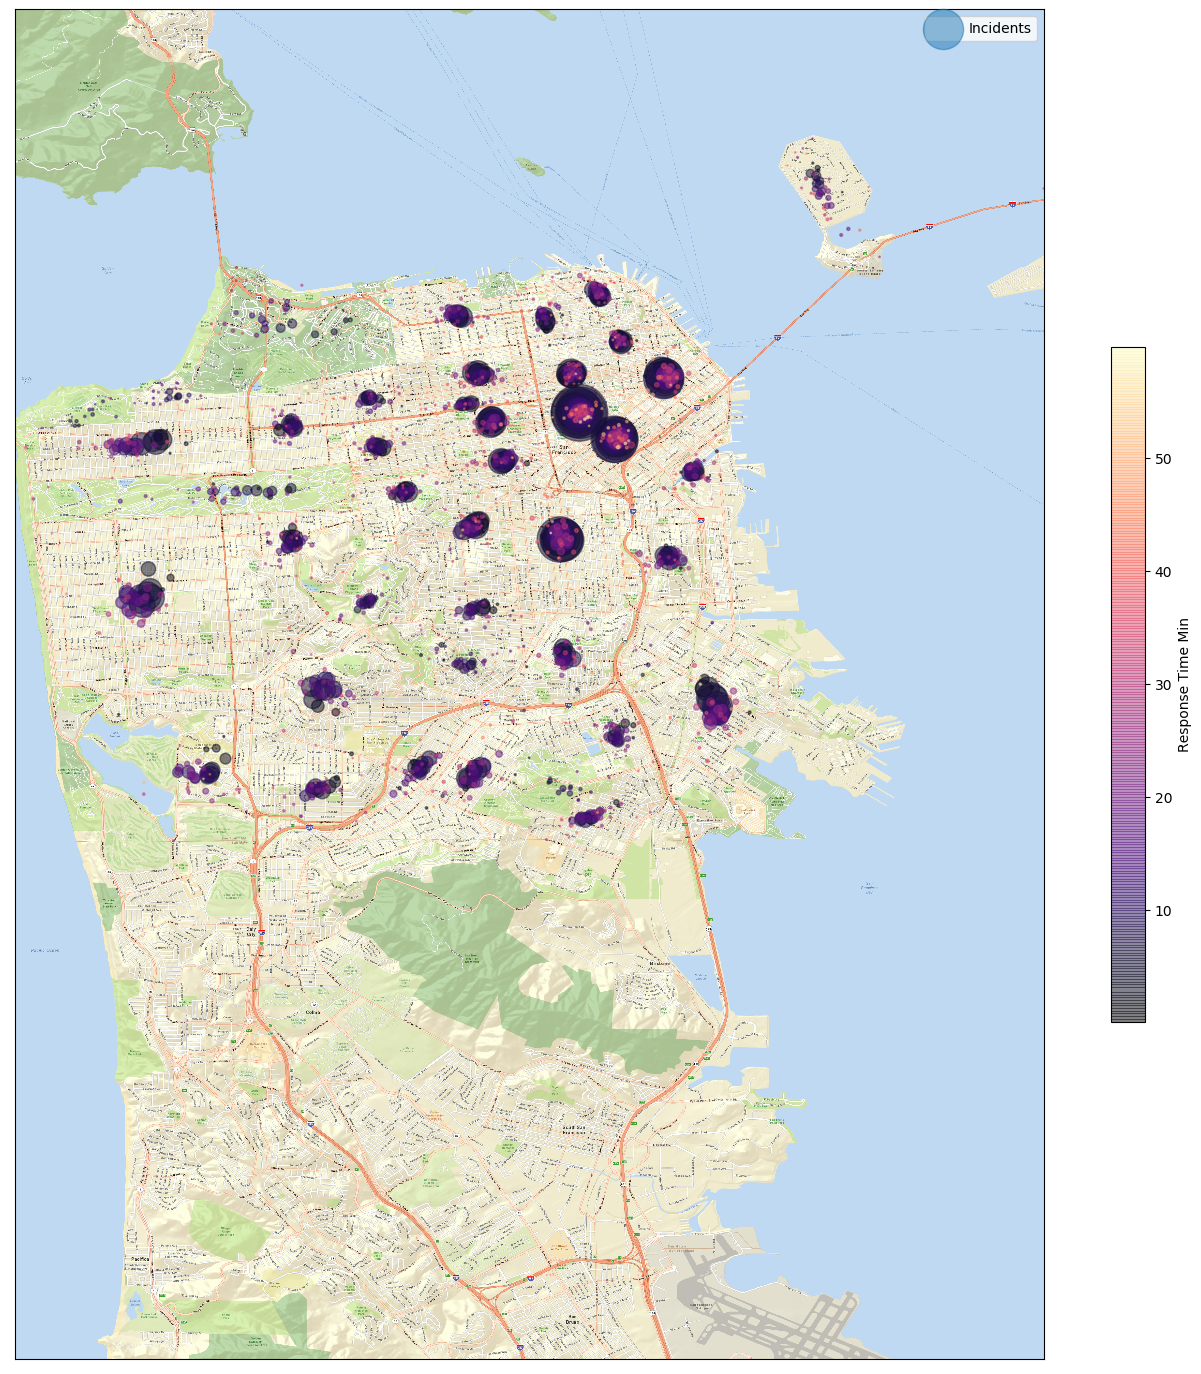

In [75]:
fig = plt.figure(figsize=[15,15], dpi=100)
ax = fig.add_axes([0.1,0.1,0.9,0.9])

# Basemap is a class which binds a map to a matplotlib axes
# - The param projection defines the type of projection we use. 'cyl' produces the cylindrical projection
# - The param resolution defines the resolution of the map. 'i' stands for intermediate resolution
# - the next four params define the boundaries of the map
# - The param ax uses the axes object we created.
m = Basemap(projection='cyl', resolution='i', 
            llcrnrlon=left_lon, llcrnrlat=bottom_lat, urcrnrlon=right_lon, urcrnrlat=top_lat, 
            ax=ax)

# To get the actual map data for this region, we need to connect to an external server. 
# There are many kinds of maps that we can get, and we have chosen one of them here which
# displays a street map of the area.
maps_service = 'ESRI_StreetMap_World_2D'
m.arcgisimage(service=maps_service, xpixels=3500, dpi=500, verbose=True)

# This step is what maps the actual latitude and longitude to the projected values for the 2-D map
# Note that the Basemap object is callable, and takes series of longitude and latitude, respectively as argument
df_location['proj_lon'], df_location['proj_lat'] = m(df_location['longitude'], df_location['latitude'])

# cmap stands for color map.
# It is essentially a mapping which maps a numerical value to a color
# There are many cmaps included in the matplotlib library.
cmap = plt.cm.get_cmap('magma')

# The dot map is created using the 'scatter()' method.
# As you can see, we are using the projected values for latitude and longitude.
# It also accepts the argument 'cmap' for the color range of dots.
sc = ax.scatter(x='proj_lon', y='proj_lat',
    s='Incident Number', label="Incidents",
    c="response_time_min", cmap=cmap, data=df_location, alpha=0.5)

# This adds a colorbar to explain what the color means
cbar = plt.colorbar(sc, shrink = 0.50)
cbar.set_label('Response Time Min')

plt.legend()
plt.show()

The final result of that code is shown above. As you could see, there is a lot going in the code, even though it's not very long.

It seems that Tenderloin, SoMa and Mission are the main hotspots for incidents. And the center of Tenderloin is where we have the brightest dots - maybe the streets are clogged and thus the trucks can't reach there quickly?

A few links that can help you explore map charts further:

- [Basemap documentation](https://matplotlib.org/basemap/api/basemap_api.html#module-mpl_toolkits.basemap)
- [A small list of map service types](https://kbkb-wx-python.blogspot.com/2016/04/python-basemap-background-image-from.html)

#### Exercise

Create a map chart visualizes the response time as it varies over the time of day. In this case, 
- the size of the dot indicates response time - larger dot for slower response
- the color of the dot indicates time of day - choose an appropriate colormap to indicate time of day ([documentation for colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html))